In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter

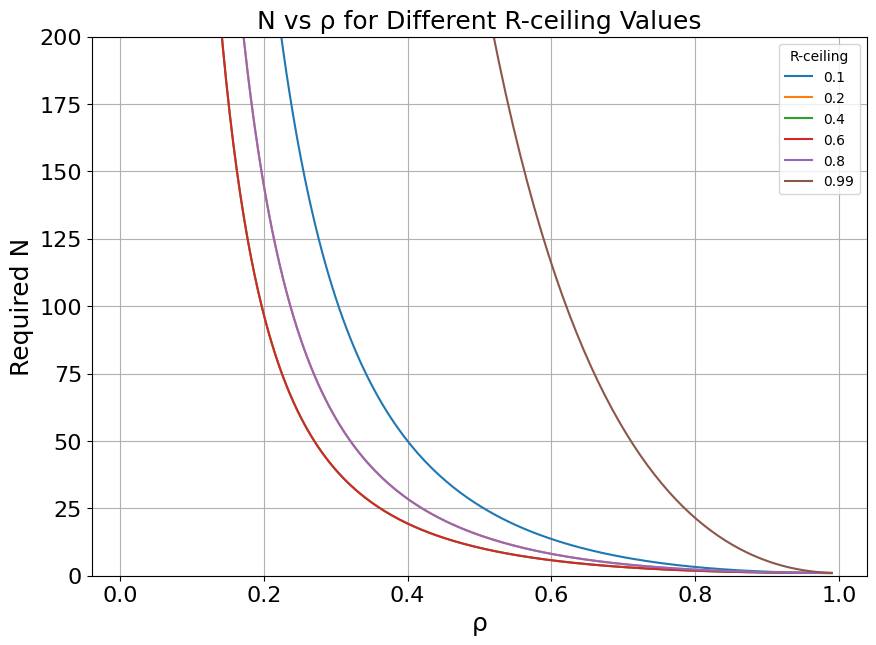

In [2]:
# Define the range of rho values
rhos = np.linspace(0.01, 0.99, 200)

# Four example R-ceiling values; adjust as needed
Rceilings = [0.1, 0.2, 0.4, 0.6, 0.8, 0.99]

# Plot N versus rho for each R-ceiling
plt.figure(figsize=(10, 7))
for R in Rceilings:
    N = 1 + ((1 - rhos**2)**2 / (rhos**2)) / (R * (1 - R))
    plt.plot(rhos, N, label=R)

# Labeling
plt.xlabel("ρ", size=18)
plt.ylabel("Required N", size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylim(0, 200)
plt.title("N vs ρ for Different R-ceiling Values", size=18)
plt.legend(title="R-ceiling")
plt.grid(True)

# Display the plot
plt.show()

In [123]:
from IPython.display import display, Math

display(Math(r"""
\begin{align}
\text{MSE}_{R_\text{unbiased}} &< \text{MSE}_{R} \\[1em]
\frac{\text{MSE}_{R_\text{unbiased}}}{\text{MSE}_{R}} &< 1
\end{align}
"""))

# Run this code in a Jupyter Notebook cell to render the equations
display(Math(r"""
\begin{align}
\text{MSE}_{R} &\approx \text{Var}(R) + \left[\rho (1 - R_{\text{ceiling}})\right]^2 \\[1em]
\text{MSE}_{R_\text{unbiased}} &\approx \frac{\text{Var}(R)}{R_{\text{ceiling}}}
\end{align}
"""))

display(Math(r"\text{where } \text{Var}(R) \approx \frac{(1 - \rho^2)^2}{N - 1} \quad \text{and} \quad \rho \approx \frac{R}{R_{\text{ceiling}}}. "))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

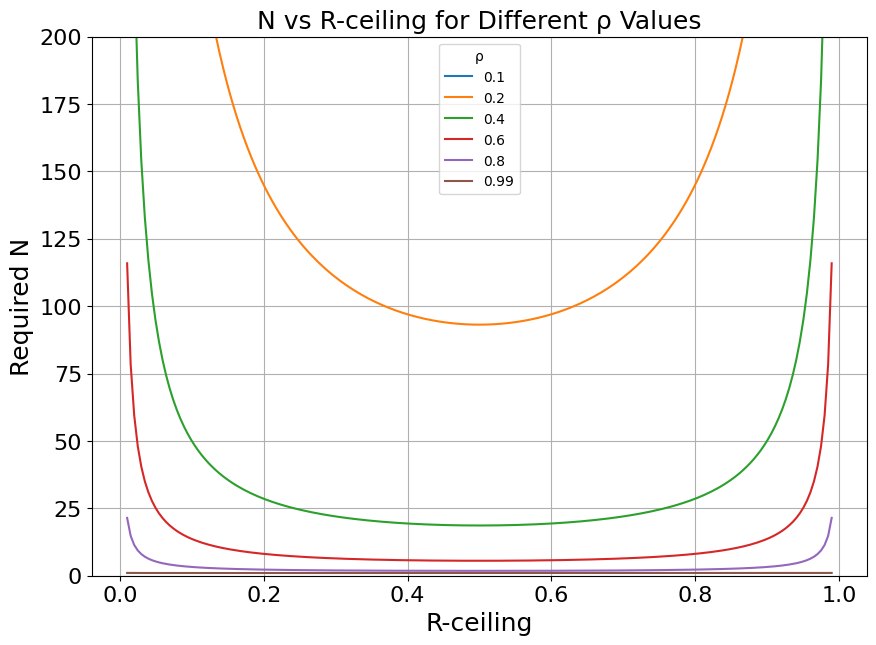

In [ ]:
# Define the range of R-ceiling values
Rceilings = np.linspace(0.01, 0.99, 200)

# Four example rho values; adjust as needed
rhos = [0.1, 0.2, 0.4, 0.6, 0.8, 0.99]

# Plot N versus R-ceiling for each rho
plt.figure(figsize=(10, 7))
for rho in rhos:
    N = 1 + ((1 - rho**2)**2 / (rho**2)) / (Rceilings * (1 - Rceilings))
    plt.plot(Rceilings, N, label=rho)

# Labeling
plt.xlabel("R-ceiling", size=18)
plt.ylabel("Required N", size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylim(0, 200)
plt.title("N vs R-ceiling for Different ρ Values", size=18)
plt.legend(title="ρ")
plt.grid(True)

# Display the plot
plt.show()


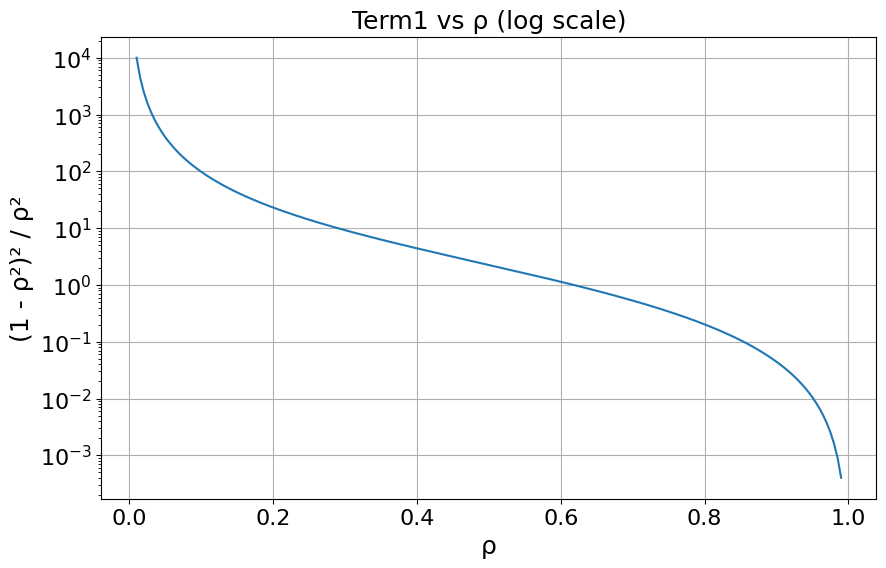

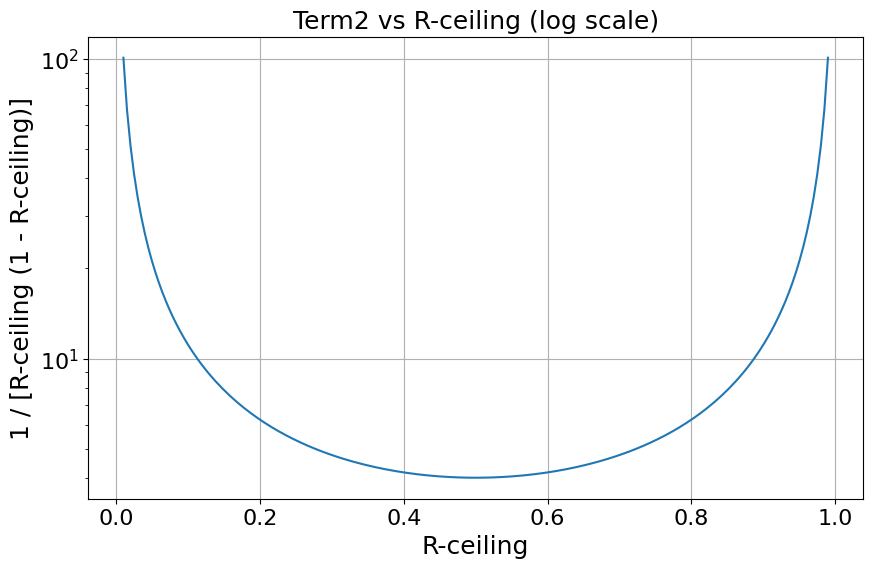

In [ ]:
# Term1: (1-ρ²)² / ρ² vs ρ
rhos = np.linspace(0.01, 0.99, 200)
term1 = ((1 - rhos**2)**2) / (rhos**2)

plt.figure(figsize=(10, 6))
plt.plot(rhos, term1)
plt.yscale('log')
plt.xlabel('ρ', size=18)
plt.ylabel('(1 - ρ²)² / ρ²', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Term1 vs ρ (log scale)', size=18)
plt.grid(True)

# Term2: 1 / [R-ceiling (1 - R-ceiling)] vs R-ceiling
Rceilings = np.linspace(0.01, 0.99, 200)
term2 = 1 / (Rceilings * (1 - Rceilings))

plt.figure(figsize=(10, 6))
plt.plot(Rceilings, term2)
plt.yscale('log')
plt.xlabel('R-ceiling', size=18)
plt.ylabel('1 / [R-ceiling (1 - R-ceiling)]', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Term2 vs R-ceiling (log scale)', size=18)
plt.grid(True)

plt.show()

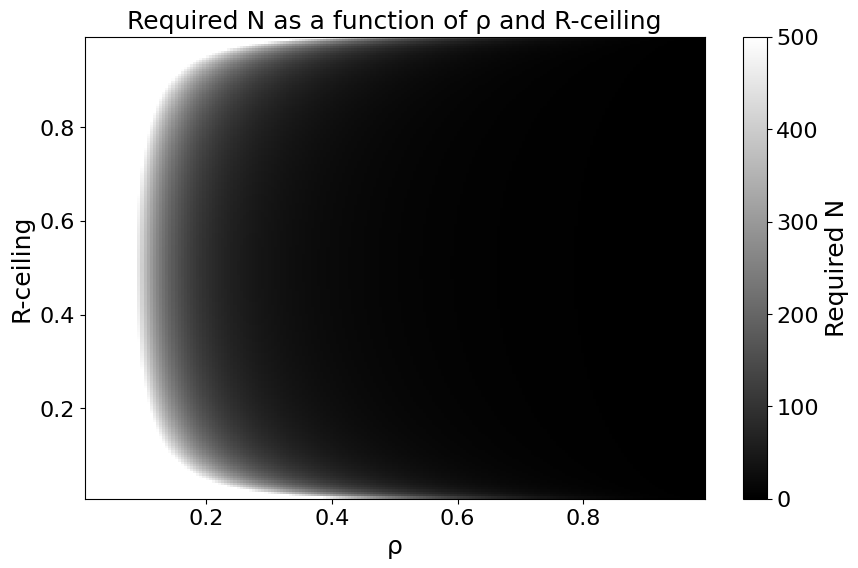

: 

In [ ]:
# Create grid for ρ and R-ceiling
rhos = np.linspace(0.01, 0.99, 200)
Rceilings = np.linspace(0.01, 0.99, 200)
Rho_grid, Rceiling_grid = np.meshgrid(rhos, Rceilings)

# Compute N on the grid
N = 1 + ((1 - Rho_grid**2)**2 / (Rho_grid**2)) / (Rceiling_grid * (1 - Rceiling_grid))

# Plot 2D heatmap with grayscale colormap, limit color scale to 0–200
plt.figure(figsize=(10, 6))
pcm = plt.pcolormesh(
    Rho_grid, Rceiling_grid, N,
    shading='auto', cmap='gray',
    vmin=0, vmax=500
)

# Labeling and styling
plt.xlabel('ρ', size=18)
plt.ylabel('R-ceiling', size=18)
plt.title('Required N as a function of ρ and R-ceiling', size=18)
plt.xticks(size=16)
plt.yticks(size=16)

# Colorbar to show N values, with scale fixed 0–200
cbar = plt.colorbar(pcm, label='Required N')
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.label.set_size(18)

plt.show()

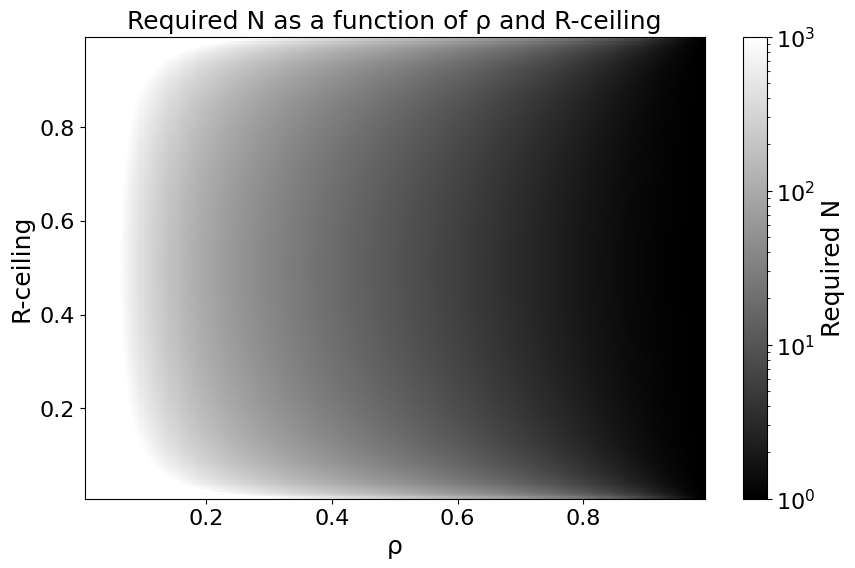

: 

In [ ]:
# Create grid for ρ and R-ceiling
rhos = np.linspace(0.01, 0.99, 200)
Rceilings = np.linspace(0.01, 0.99, 200)
Rho_grid, Rceiling_grid = np.meshgrid(rhos, Rceilings)

# Compute N on the grid
N = 1 + ((1 - Rho_grid**2)**2 / (Rho_grid**2)) / (Rceiling_grid * (1 - Rceiling_grid))

# Plot 2D heatmap with grayscale colormap, limit color scale to 0–200
plt.figure(figsize=(10, 6))
pcm = plt.pcolormesh(
    Rho_grid, Rceiling_grid, N,
    shading='auto', cmap='gray',
    norm=LogNorm(vmin=1, vmax=1000)
)

# Labeling and styling
plt.xlabel('ρ', size=18)
plt.ylabel('R-ceiling', size=18)
plt.title('Required N as a function of ρ and R-ceiling', size=18)
plt.xticks(size=16)
plt.yticks(size=16)

# Colorbar to show N values, with scale fixed 0–200
cbar = plt.colorbar(pcm, label='Required N')
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.label.set_size(18)

plt.show()

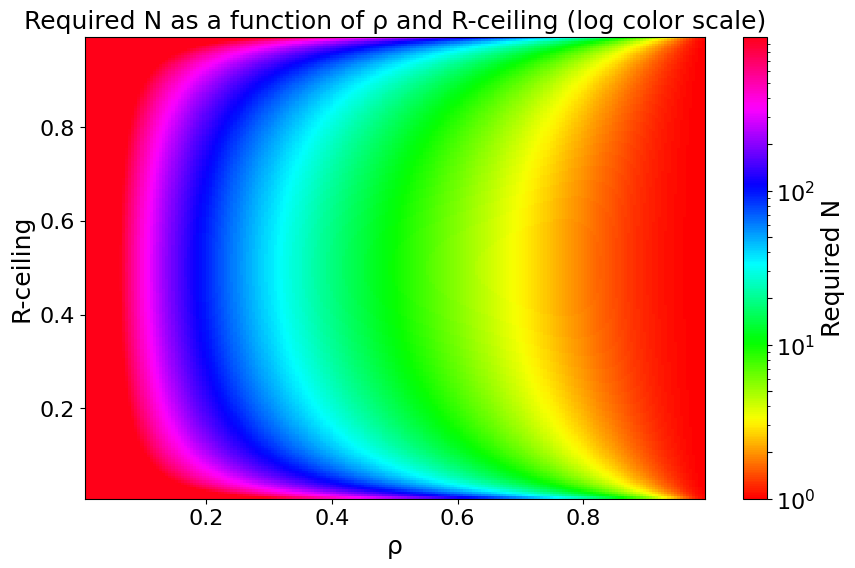

In [ ]:
# Create grid for ρ and R-ceiling
rhos = np.linspace(0.01, 0.99, 200)
Rceilings = np.linspace(0.01, 0.99, 200)
Rho_grid, Rceiling_grid = np.meshgrid(rhos, Rceilings)

# Compute N on the grid
N = 1 + ((1 - Rho_grid**2)**2 / (Rho_grid**2)) / (Rceiling_grid * (1 - Rceiling_grid))

# Plot 2D heatmap with a log-scale color mapping
plt.figure(figsize=(10, 6))
pcm = plt.pcolormesh(
    Rho_grid, Rceiling_grid, N,
    shading='auto',
    cmap='hsv',
    norm=LogNorm(vmin=1, vmax=1000)
)

# Labeling and styling
plt.xlabel('ρ', size=18)
plt.ylabel('R-ceiling', size=18)
plt.title('Required N as a function of ρ and R-ceiling (log color scale)', size=18)
plt.xticks(size=16)
plt.yticks(size=16)

# Colorbar with log scale and selected ticks
cbar = plt.colorbar(pcm, ticks=[1, 2, 5, 10, 20, 50, 100, 200])
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.label.set_size(18)
cbar.set_label('Required N', size=18)

plt.show()


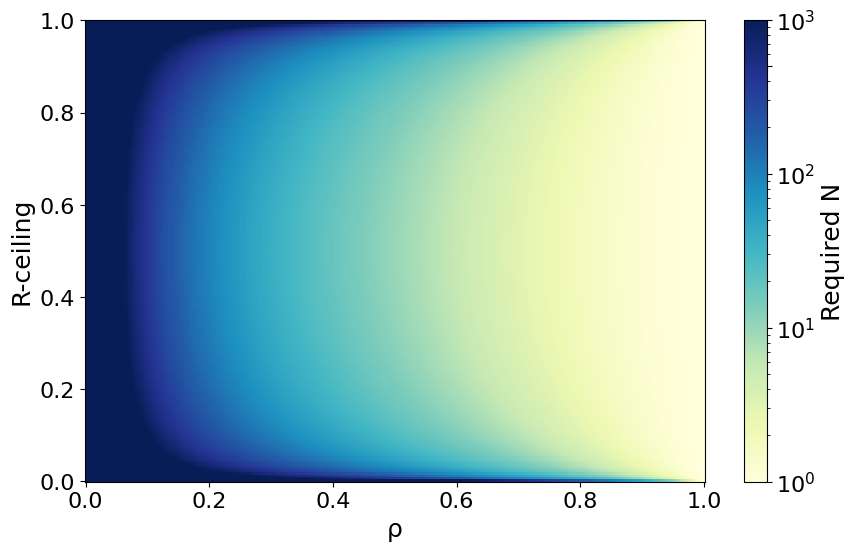

In [ ]:
# Create grid for ρ and R-ceiling
rhos = np.linspace(0.001, 0.999, 200)
Rceilings = np.linspace(0.001, 0.999, 200)
Rho_grid, Rceiling_grid = np.meshgrid(rhos, Rceilings)

# Compute N on the grid
N = 1 + ((1 - Rho_grid**2)**2 / (Rho_grid**2)) / (Rceiling_grid * (1 - Rceiling_grid))

# Plot 2D heatmap with a log-scale color mapping
plt.figure(figsize=(10, 6))
pcm = plt.pcolormesh(
    Rho_grid, Rceiling_grid, N,
    shading='auto',
    cmap='YlGnBu',
    norm=LogNorm(vmin=1, vmax=1000)
)

# Labeling and styling
plt.xlabel('ρ', size=18)
plt.ylabel('R-ceiling', size=18)
#plt.title('Required N as a function of ρ and R-ceiling (log color scale)', size=10)
plt.xticks(size=16)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], size=16)

# Colorbar with log scale and selected ticks
cbar = plt.colorbar(pcm, ticks=[1, 10, 100, 500, 1000])
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.label.set_size(18)
cbar.set_label('Required N', size=18)

plt.show()


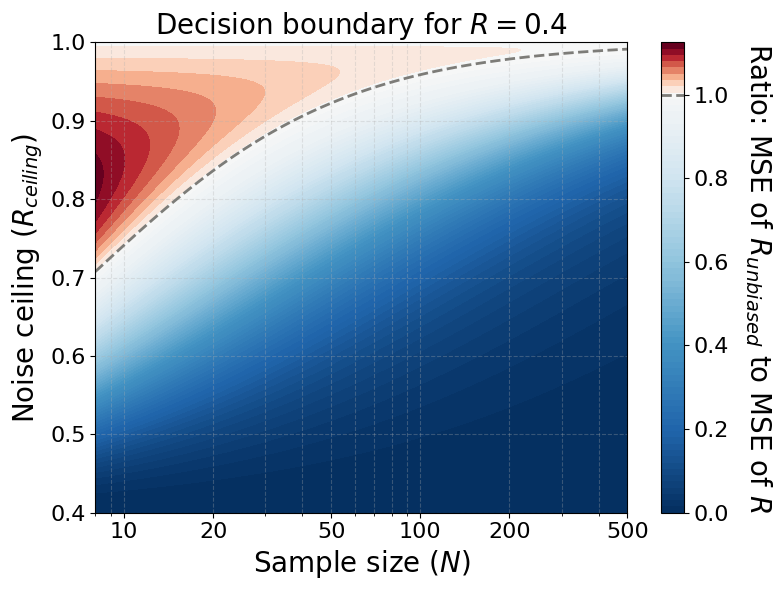

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import TwoSlopeNorm

def calculate_mse_ratio(n, r_ceiling, R):
    """
    Calculates the ratio of MSE_unbiased to MSE_raw based on:
    1. Var(R) ~= ((1 - rho^2)^2) / (N - 1)
    2. MSE_raw ~= Var(R) + [rho * (1 - R_ceiling)]^2
    3. MSE_unbiased ~= Var(R) / R_ceiling
    where rho ~= R / R_ceiling
    """
    # Calculate rho from R and R_ceiling
    rho = R / r_ceiling
    
    # Equation [5]: Approximate Variance of R
    var_r = ((1 - rho**2)**2) / (n - 1)
    
    # Equation [1]: MSE Raw
    # Note: The bias term is squared: [rho(1 - R_ceiling)]^2
    bias_squared = (rho * (1 - r_ceiling))**2
    mse_raw = var_r + bias_squared
    
    # Equation [2]: MSE Unbiased
    # Note: Image implies MSE_unbiased is Var(R) scaled by 1/R_ceiling
    mse_unbiased = var_r / r_ceiling
    
    return mse_unbiased / mse_raw


def plot_mse_ratio_heatmap(R_value):
    # --- Configuration ---
    n_min, n_max = 8, 500
    r_min, r_max = 0.4, 1.0

    # --- Data Generation ---
    # Increased resolution (200 -> 500) for smoother contours and better label rotation
    n_range = np.logspace(np.log10(n_min), np.log10(n_max), 500)
    r_range = np.linspace(r_min, r_max, 500)
    N, R_Ceiling = np.meshgrid(n_range, r_range)

    # Calculate the Ratio Matrix
    Ratio = calculate_mse_ratio(N, R_Ceiling, R_value)

    # --- Plotting ---
    plt.figure(figsize=(8, 6))

    # Create a TwoSlopeNorm centered at 1.0
    norm = TwoSlopeNorm(vmin=Ratio.min(), vcenter=1.0, vmax=Ratio.max())

    # Create the filled contour plot (Heatmap)
    cp = plt.contourf(N, R_Ceiling, Ratio, levels=100, cmap='RdBu_r', norm=norm)

    # --- FIX FOR LINE AND LABEL ---
    # 1. Create a copy of the data for the line contour
    Ratio_line = Ratio.copy()
    
    # 2. Mask the top edge (where R_ceiling is effectively 1.0)
    Ratio_line[np.isclose(R_Ceiling, 1.0)] = np.nan

    # 3. Plot the contour line using the masked data
    line_contour = plt.contour(N, R_Ceiling, Ratio_line, levels=[1.0], colors=plt.cm.cividis(0.5), linewidths=2, linestyles='--')
    
    # 4. Calculate exact position for the label at N ~ 40
    #    Finding the precise intersection ensures the rotation angle is calculated correctly.
    target_n = 40
    idx_n = np.abs(n_range - target_n).argmin() # Find index of N closest to 40
    idx_r = np.abs(Ratio_line[:, idx_n] - 1.0).argmin() # Find index of R where Ratio is closest to 1.0
    
    label_n = n_range[idx_n]
    label_r = r_range[idx_r]

    # 5. Place label using the calculated exact coordinate
   # plt.clabel(
   #     line_contour, 
   #     inline=True, 
   #     fontsize=16, 
   #     fmt={1.0: r'$R$ = '}, 
    #    manual=[(label_n, label_r)],
    #    use_clabeltext=True  # Helps with rotation rendering
    #)

    # Add a colorbar
    cbar = plt.colorbar(cp, ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    cbar.set_label(r'Ratio: MSE of $R_{unbiased}$ to MSE of $R$', rotation=270, labelpad=32, fontsize=20)
    cbar.ax.tick_params(labelsize=16)
    cbar.ax.axhline(y=1.0, color=plt.cm.cividis(0.5), linestyle='--', linewidth=2)
    

    # --- Log Scale Configuration ---
    plt.xscale('log')
    plt.ylim(0.4, 1)

    # Set specific ticks
    ticks = [10, 20, 50, 100, 200, 500]
    plt.xticks(ticks, labels=[str(t) for t in ticks])

    # Remove scientific notation
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())

    # Labels and Title
    plt.xlabel('Sample size ($N$)', fontsize=20)
    plt.ylabel(r'Noise ceiling ($R_{ceiling}$)', fontsize=20)
    plt.title(f'Decision boundary for $R = {R_value}$', fontsize=20)
    plt.xticks(size=16)
    plt.yticks(size=16)

    # Add grid
    plt.grid(True, which="both", ls="--", linewidth=0.8, alpha=0.3)

    # Show plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_mse_ratio_heatmap(R_value=0.4)

PLOT WITH VARIOUS CONTOURS FOR R

/var/folders/tv/bsvxxkg10s71322nv0drgww00000gn/T/ipykernel_27787/692128151.py:11: RuntimeWarning: divide by zero encountered in divide
  return mse_raw / mse_unbiased


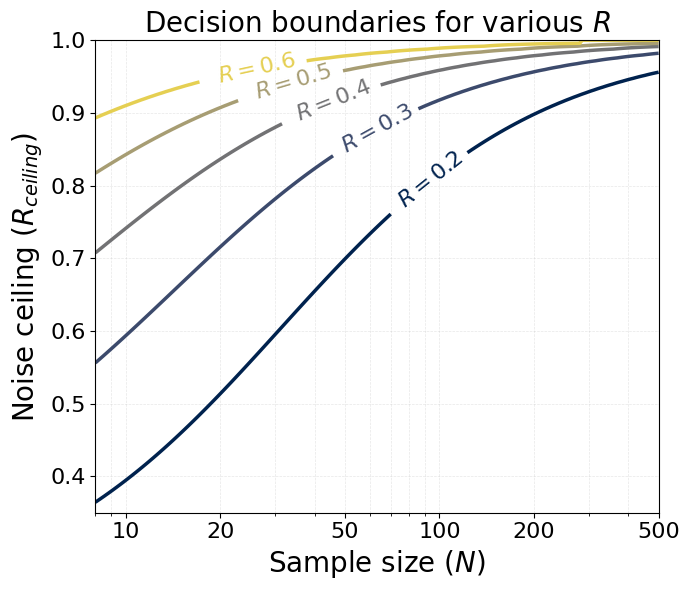

In [115]:
def calculate_mse_ratio(n, r_ceiling, R):
    """
    Calculates the ratio of MSE_raw to MSE_unbiased.
    Returns: MSE_raw / MSE_unbiased
    """
    rho = R / r_ceiling
    var_r = ((1 - rho**2)**2) / (n - 1)
    bias_squared = (rho * (1 - r_ceiling))**2
    mse_raw = var_r + bias_squared
    mse_unbiased = var_r / r_ceiling
    return mse_raw / mse_unbiased

def solve_r_ceiling_for_fixed_n(n_target, N_grid, R_Ceiling_grid, Ratio_grid):
    """
    Finds the R_ceiling value where Ratio=1.0 for a fixed N.
    Uses interpolation on the generated grid data.
    """
    # Get the unique N values (x-axis) from the grid
    n_values = N_grid[0, :]
    
    # Find the column index in the grid closest to n_target
    idx = np.abs(n_values - n_target).argmin()
    
    # Extract the R_ceiling and Ratio columns at this N
    r_ceil_col = R_Ceiling_grid[:, idx]
    ratio_col = Ratio_grid[:, idx]
    
    # We need to find r_ceil where ratio_col == 1.0
    # np.interp expects the x-coordinate (ratio) to be sorted/increasing
    sorted_indices = np.argsort(ratio_col)
    ratio_sorted = ratio_col[sorted_indices]
    r_ceil_sorted = r_ceil_col[sorted_indices]
    
    # Interpolate to find the R_ceiling value
    return np.interp(1.0, ratio_sorted, r_ceil_sorted)

def plot_mse_ratio_contours():
    # --- Configuration ---
    # Contours for "R" (Naive Correlation / Rho)
    r_naive_values = [0.2, 0.3, 0.4, 0.5, 0.6]
    
    # Spacing adjustments for labels
    # Lower correlation (0.2) needs more space, higher (0.6) needs less
    spacings = [0, -10, -15, -20, -25] 
    
    n_min, n_max = 8, 500
    r_ceil_min, r_ceil_max = 0.2, 1.0  # Y-axis range for R_ceiling
    
    # Target X-value (Sample Size) for all labels (Vertical alignment)
    label_n_fixed = 10

    # --- Data Generation ---
    n_range = np.logspace(np.log10(n_min), np.log10(n_max), 200)
    r_ceil_range = np.linspace(r_ceil_min, r_ceil_max, 200)
    
    # Grid: N on X, R_ceiling on Y
    N, R_Ceiling = np.meshgrid(n_range, r_ceil_range)

    # --- Plotting ---
    plt.figure(figsize=(7, 6))

    # Create distinct colors for the contours
    colors = plt.cm.cividis(np.linspace(0, 0.9, len(r_naive_values)))

    for i, r_val in enumerate(r_naive_values):
        # Calculate Ratio for current Naive R
        Ratio = calculate_mse_ratio(N, R_Ceiling, r_val)
        
        # Plot the contour line where Ratio = 1.0
        CS = plt.contour(
            N, R_Ceiling, Ratio, 
            levels=[1.0], 
            colors=[colors[i]], 
            linewidths=2.5, linestyles='-'
        )
        
        # Calculate the exact R_ceiling where this curve crosses our target N
        label_r_ceil_pos = solve_r_ceiling_for_fixed_n(label_n_fixed, N, R_Ceiling, Ratio)
        
        # Add label at the calculated manual position if it's within plot range
        if r_ceil_min <= label_r_ceil_pos <= r_ceil_max:
            plt.clabel(
                CS, 
                inline=True, 
                fontsize=16, 
                fmt={1.0: f'$R = {r_val}$'},
                manual=[(label_n_fixed, label_r_ceil_pos)],
                use_clabeltext=True,
                inline_spacing=spacings[i]
            )

    # --- Log Scale Configuration ---
    plt.xscale('log')
    
    # Ensure tick labels are readable integers
    ticks = [10, 20, 50, 100, 200, 500]
    plt.xticks(ticks, labels=[str(t) for t in ticks])
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())

    # Labels and Title
    plt.xlabel(r'Sample size ($N$)', fontsize=20)
    plt.ylabel(r'Noise ceiling ($R_{ceiling}$)', fontsize=20)
    plt.title(r'Decision boundaries for various $R$', fontsize=20)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.ylim(0.35, 1.0)

    plt.grid(True, which="both", ls="--", linewidth=0.5, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_mse_ratio_contours()

REPEAT WRT RHO

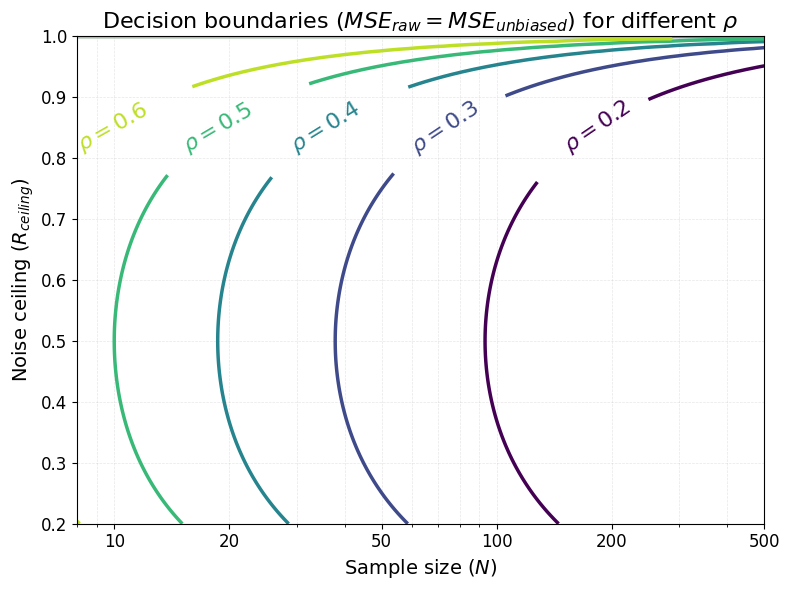

In [31]:
def calculate_mse_ratio(n, r_ceiling, rho):
    """
    Calculates the ratio of MSE_unbiased to MSE_raw based on:
    1. Var(R) ~= ((1 - rho^2)^2) / (N - 1)
    2. MSE_raw ~= Var(R) + [rho * (1 - R_ceiling)]^2
    3. MSE_unbiased ~= Var(R) / R_ceiling
    where rho ~= R / R_ceiling
    """
    # Calculate rho from R and R_ceiling
    var_r = ((1 - rho**2)**2) / (n - 1)
    
    # Equation [1]: MSE Raw
    # Note: The bias term is squared: [rho(1 - R_ceiling)]^2
    bias_squared = (rho * (1 - r_ceiling))**2
    mse_raw = var_r + bias_squared
    
    # Equation [2]: MSE Unbiased
    # Note: Image implies MSE_unbiased is Var(R) scaled by 1/R_ceiling
    mse_unbiased = var_r / r_ceiling
    
    return mse_unbiased / mse_raw

def solve_n_for_fixed_r_ceiling(r_ceil_target, N_grid, R_Ceiling_grid, Ratio_grid):
    """Finds N where Ratio=1.0 for fixed R_ceiling using interpolation."""
    idx = np.abs(R_Ceiling_grid[:, 0] - r_ceil_target).argmin()
    return np.interp(1.0, np.sort(Ratio_grid[idx]), N_grid[idx, np.argsort(Ratio_grid[idx])])

def plot_mse_ratio_contours():
    # --- Configuration ---
    # Contours for "rho" (True Construct Correlation)
    rho_values = [0.2, 0.3, 0.4, 0.5, 0.6]
    
    # Spacing adjustments for labels
    spacings = [50, 12, 10, 7, 1] 
    
    n_min, n_max = 8, 500
    r_ceil_min, r_ceil_max = 0.2, 1.0
    
    # Target Y-value (R_ceiling) for all labels (Horizontal alignment)
    # This replaces label_n_fixed
    label_r_ceil_fixed = 0.85

    # --- Data Generation ---
    n_range = np.logspace(np.log10(n_min), np.log10(n_max), 200)
    r_ceil_range = np.linspace(r_ceil_min, r_ceil_max, 200)
    
    # Grid: N on X, R_ceiling on Y
    N, R_Ceiling = np.meshgrid(n_range, r_ceil_range)

    # --- Plotting ---
    plt.figure(figsize=(8, 6))

    # Create distinct colors for the contours
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(rho_values)))

    for i, rho_val in enumerate(rho_values):
        # Calculate Ratio for current Rho
        Ratio = calculate_mse_ratio(N, R_Ceiling, rho_val)
        
        # Plot the contour line where Ratio = 1.0
        CS = plt.contour(
            N, R_Ceiling, Ratio, 
            levels=[1.0], 
            colors=[colors[i]], 
            linewidths=2.5
        )
        
        # Calculate the exact N where this curve crosses our target R_ceiling
        label_n_pos = solve_n_for_fixed_r_ceiling(label_r_ceil_fixed, N, R_Ceiling, Ratio)
        
        # Add label at the calculated manual position if it's within plot range
        if n_min <= label_n_pos <= n_max:
            plt.clabel(
                CS, 
                inline=True, 
                fontsize=16, 
                fmt={1.0: f'$\\rho = {rho_val}$'},
                manual=[(label_n_pos, label_r_ceil_fixed)],
                use_clabeltext=True,
                inline_spacing=spacings[i]
            )

    # --- Log Scale Configuration ---
    plt.xscale('log')
    
    # Ensure tick labels are readable integers
    ticks = [10, 20, 50, 100, 200, 500]
    plt.xticks(ticks, labels=[str(t) for t in ticks])
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())

    # Labels and Title
    plt.xlabel(r'Sample size ($N$)', fontsize=14)
    plt.ylabel(r'Noise ceiling ($R_{ceiling}$)', fontsize=14)
    plt.title(r'Decision boundaries ($MSE_{raw} = MSE_{unbiased}$) for different $\rho$', fontsize=16)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Restore full ylim
    plt.ylim(0.2, 1.0)

    plt.grid(True, which="both", ls="--", linewidth=0.5, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_mse_ratio_contours()